# Surface Normal Smoothing -- Convolution

In [150]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

cm = 1/2.54  # centimeters in inches

cellsize = 10

In [151]:
H = np.asarray(Image.open(r"./ConeDEM.tif"))
#H = np.asarray(Image.open(r"../CraterLake.tif"))
#plt.axis('off')
#plt.imshow(H, cmap='cividis')

In [152]:
k = np.asarray([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])

dx = signal.convolve2d(H, k) / (8 * cellsize)


In [153]:
k = np.asarray([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
dy = signal.convolve2d(H, k) / (8 * cellsize)

In [154]:
mag = np.sqrt(dx ** 2 + dy ** 2 + 1)
snv = np.stack([-dx / mag, -dy / mag, 1 / mag], 0)
snv_pic  = (np.moveaxis(snv, 0, 2) + 1)/ 2

In [155]:
from trf import shader, utils

lv = utils.lightVector(315, 45)
hs_1 = shader.lambert(snv, lv)

In [157]:
k = np.asarray([
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [1, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, -1 ],
                [2, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, -2 ],
                [1, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, -1 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ]])

dx = signal.convolve2d(H, k) / (8*cellsize)


In [158]:
k = np.asarray([
                [0, 0, 0, 0, 0, 0, 0, -1,  -2, -1, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0 ],
                [0, 0, 0, 0, 0, 0, 0, 1,  2, 1, 0, 0, 0, 0, 0, 0, 0 ]])
dy = signal.convolve2d(H, k) / (8*cellsize)

In [159]:
mag = np.sqrt(dx ** 2 + dy ** 2 + 1)
snv = np.stack([-dx / mag, -dy / mag, 1 / mag], 0)


In [160]:
hs_2 = shader.lambert(snv, lv)

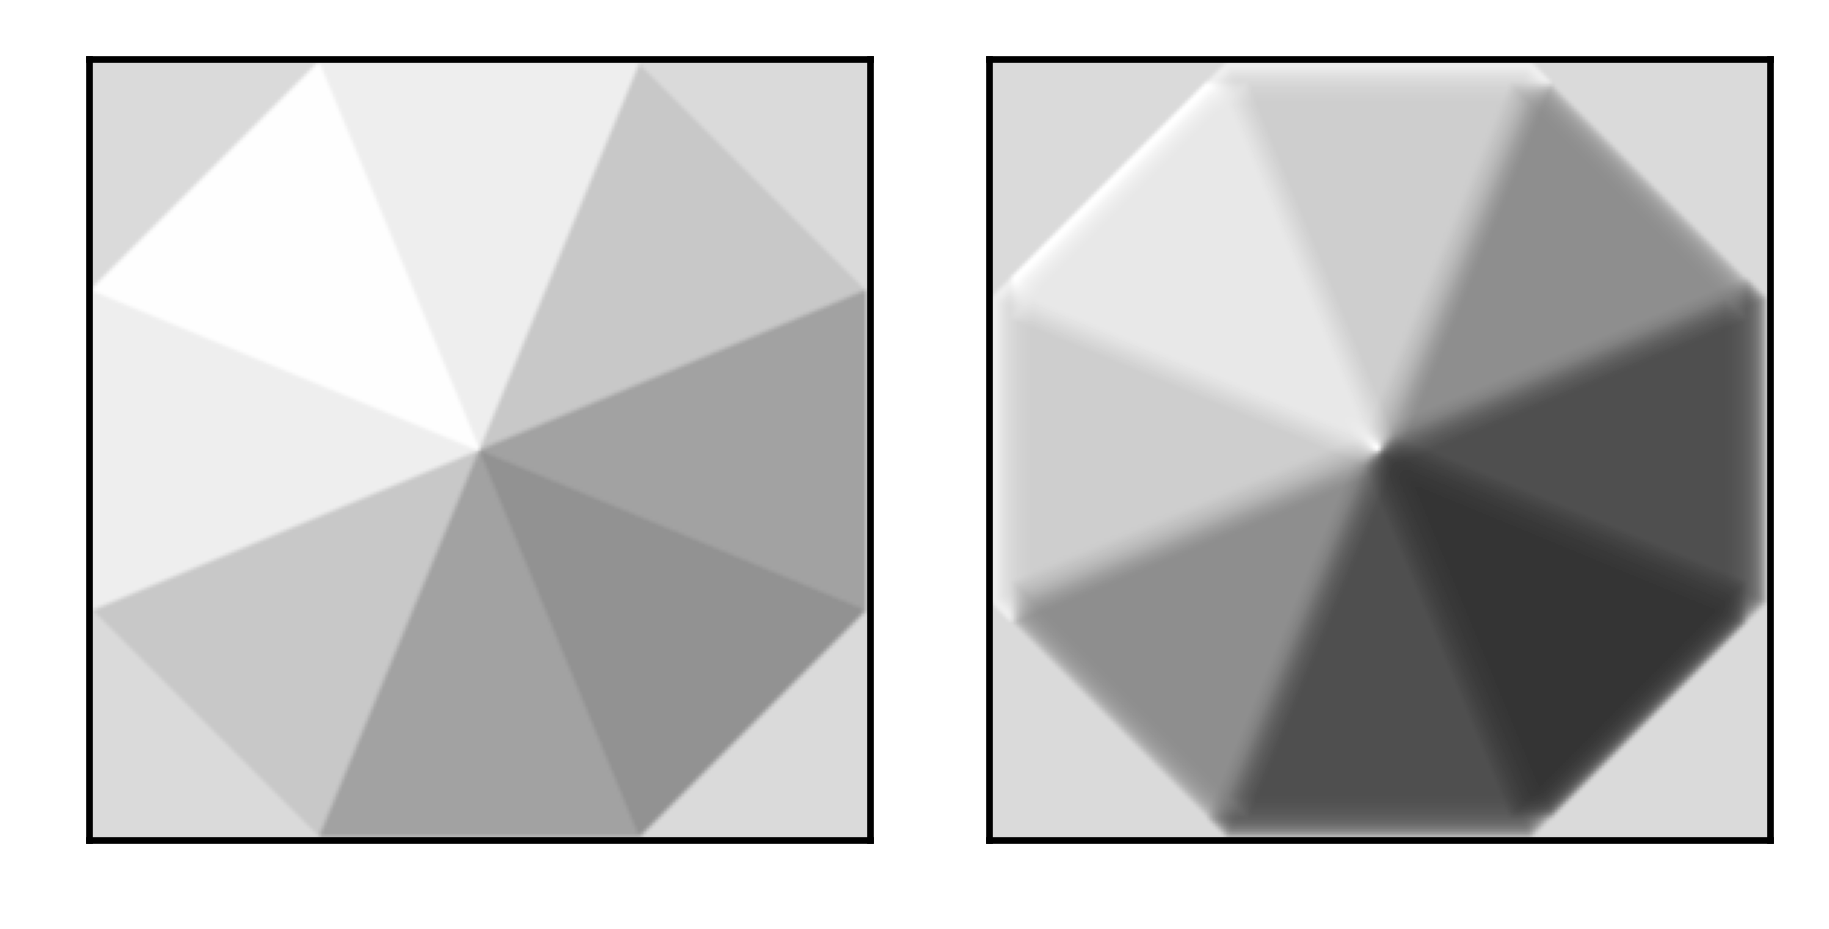

In [165]:
%matplotlib inline
fig, axs = plt.subplots(1,2, figsize=(8*cm, 6*cm))
fig.set_dpi(600)
axs[0].yaxis.set_visible(False)
axs[0].xaxis.set_visible(False)
axs[0].imshow((hs_1 + 1) / 2, cmap='gray', vmin=0, vmax=1)

axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False)
axs[1].imshow((hs_2 + 1) / 2, cmap='gray', vmin=0, vmax=1)

plt.tight_layout()

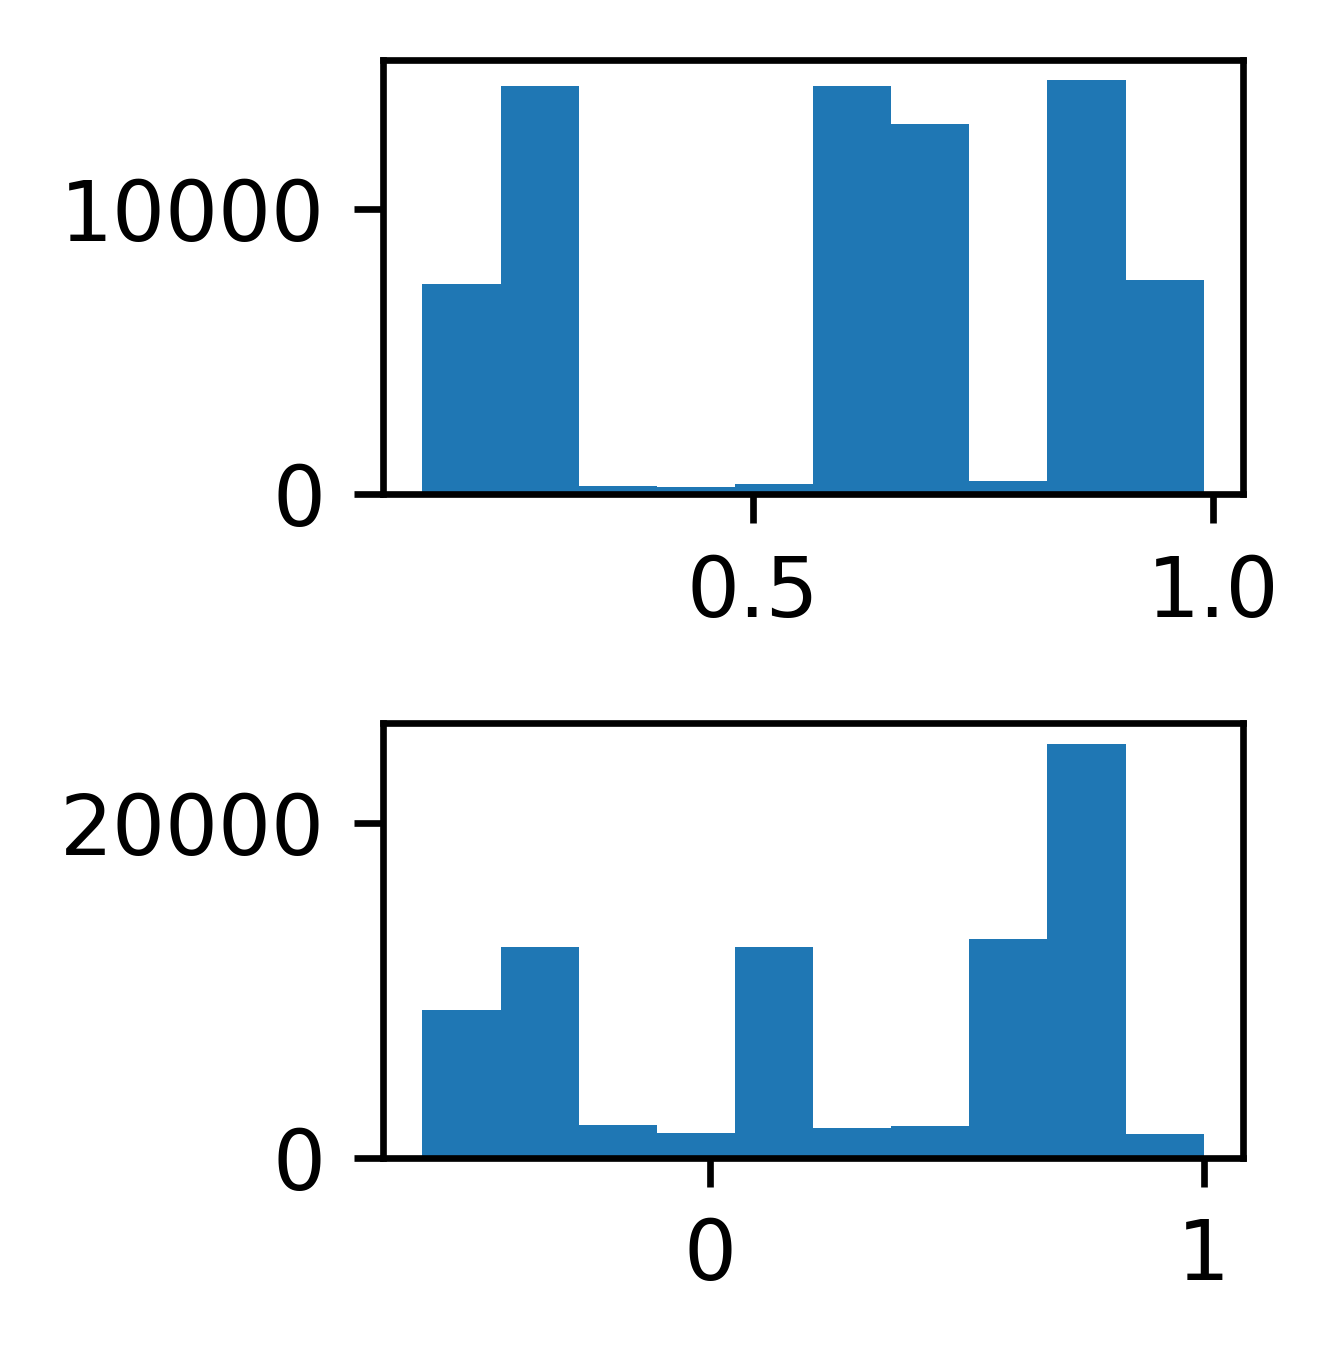

In [166]:
%matplotlib inline
fig, axs = plt.subplots(2,1, figsize=(6*cm, 6*cm))
fig.set_dpi(600)
#axs[0].yaxis.set_visible(False)
#axs[0].xaxis.set_visible(False)
axs[0].hist(hs_1.ravel())

#axs.yaxis.set_visible(False)
#axs.xaxis.set_visible(False)
axs[1].hist(hs_2.ravel())

plt.tight_layout()